## Time Series Project

1. Explore the electricity dataset, using tools like line charts and decomposition
2. Forecast the first three days of February 2017 (72 hours) of electricity consumption for column `PowerConsumption_Zone1`, using the entire month of January 2017 to train your Model.
3. Fit both a Linear Regression model and Facebook Prophet. Compare their accuracy using plots of predicted vs. actual, as well as metrics like MAE and MAPE


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_percentage_error as mape
from sklearn.metrics import mean_absolute_error as mae
import statsmodels.api as sm


electricity_df = pd.read_csv(
    "../Data/powerconsumption.csv", 
    index_col=["Datetime"],
    parse_dates=["Datetime"]
).resample("H").mean()

electricity_df.head()

C:\Users\fonse\AppData\Local\Temp\ipykernel_7692\3940503859.py:14: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  ).resample("H").mean()


,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
Datetime,,,,,,,,
2017-01-01 00:00:00,6.196833,75.066667,0.081833,0.063500,0.098833,29197.974683,18026.747720,19252.048193
2017-01-01 01:00:00,5.548833,77.583333,0.082000,0.056833,0.112500,24657.215190,16078.419453,17042.891567
2017-01-01 02:00:00,5.054333,78.933333,0.082333,0.063000,0.129167,22083.037973,14330.699088,15676.144578
2017-01-01 03:00:00,5.004333,77.083333,0.082833,0.059833,0.141000,20811.139240,13219.452887,14883.855422
2017-01-01 04:00:00,5.097667,74.050000,0.082333,0.058000,0.122833,20475.949367,12921.580547,14317.108433


<Axes: xlabel='Datetime'>

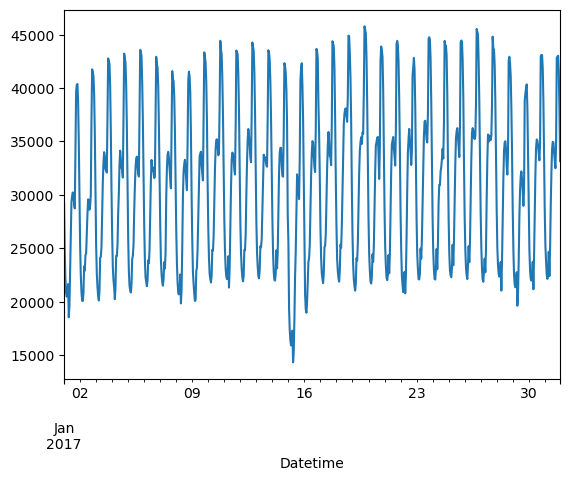

In [2]:
electricity_df["PowerConsumption_Zone1"].iloc[:744].plot()

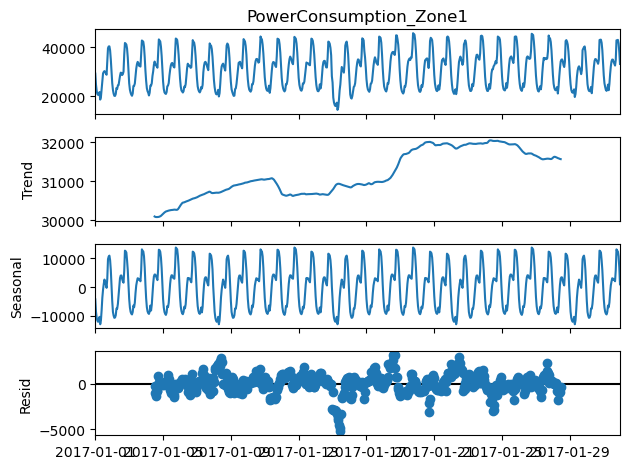

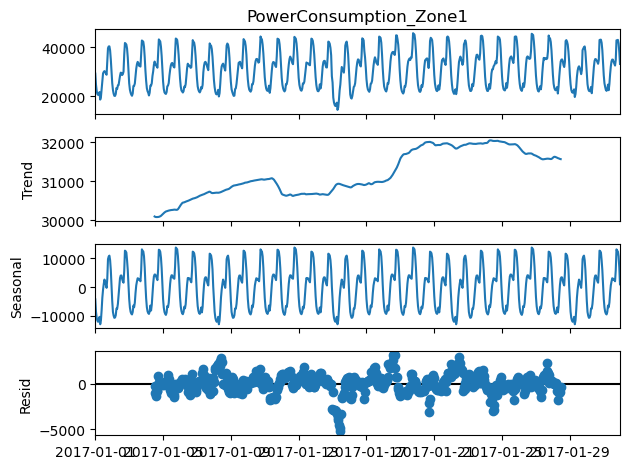

In [3]:
from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(electricity_df["PowerConsumption_Zone1"].iloc[:744], period=(24 * 7))

result.plot()

## Linear Regression

In [4]:
electricity_df = electricity_df["PowerConsumption_Zone1"].reset_index()
electricity_df = electricity_df.assign(
    trend = electricity_df.index,
    hour = electricity_df["Datetime"].dt.hour.astype("string"),
#     day_of_week = electricity_df["Datetime"].dt.dayofweek.astype("string"),
).set_index("Datetime")

electricity_df = pd.get_dummies(electricity_df, drop_first=True, dtype="int")

electricity_df.head()

electricity_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 8736 entries, 2017-01-01 00:00:00 to 2017-12-30 23:00:00
Data columns (total 25 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   PowerConsumption_Zone1  8736 non-null   float64
 1   trend                   8736 non-null   int64  
 2   hour_1                  8736 non-null   int64  
 3   hour_10                 8736 non-null   int64  
 4   hour_11                 8736 non-null   int64  
 5   hour_12                 8736 non-null   int64  
 6   hour_13                 8736 non-null   int64  
 7   hour_14                 8736 non-null   int64  
 8   hour_15                 8736 non-null   int64  
 9   hour_16                 8736 non-null   int64  
 10  hour_17                 8736 non-null   int64  
 11  hour_18                 8736 non-null   int64  
 12  hour_19                 8736 non-null   int64  
 13  hour_2                  8736 non-null   int64  
 14  hour

In [5]:
electricity_train = electricity_df.loc[:"2017-01-31"]
electricity_test = electricity_df.loc["2017-02-01": "2017-02-03"]

X_train = sm.add_constant(electricity_train.drop("PowerConsumption_Zone1", axis=1))
y_train = electricity_train["PowerConsumption_Zone1"]

X_test = sm.add_constant(electricity_test.drop("PowerConsumption_Zone1", axis=1))
y_test = electricity_test["PowerConsumption_Zone1"]

In [6]:
import statsmodels.api as sm

model = sm.OLS(y_train, X_train).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     PowerConsumption_Zone1   R-squared:                       0.951
Model:                                OLS   Adj. R-squared:                  0.949
Method:                     Least Squares   F-statistic:                     577.4
Date:                    Sun, 28 Dec 2025   Prob (F-statistic):               0.00
Time:                            07:46:43   Log-Likelihood:                -6558.4
No. Observations:                     744   AIC:                         1.317e+04
Df Residuals:                         719   BIC:                         1.328e+04
Df Model:                              24                                         
Covariance Type:                nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       2.634e+04    314.697     83.687      0.000    2.57e+04     2.7e+04
trend          2.7642      0.283      9.763      0.000       2.208       3.320
hour_1     -3371.1268    421.061     -8.006      0.000   -4197.783   -2544.471
hour_10     3722.1664    421.070      8.840      0.000    2895.492    4548.841
hour_11     5958.7162    421.072     14.151      0.000    5132.038    6785.394
hour_12     6754.9721    421.075     16.042      0.000    5928.290    7581.655
hour_13     6920.6359    421.077     16.436      0.000    6093.949    7747.323
hour_14     6197.7084    421.079     14.719      0.000    5371.016    7024.401
hour_15     5565.0054    421.082     13.216      0.000    4738.308    6391.703
hour_16     5048.1049    421.085     11.988      0.000    4221.401    5874.808
hour_17     8939.2729    421.088     21.229      0.000    8112.563    9765.983
hour_18      1.57e+04    421.092     37.293      0.000    1.49e+04    1.65e+04
hour_19     1.567e+04    421.095     37.206      0.000    1.48e+04    1.65e+04
hour_2     -5008.9746    421.061    -11.896      0.000   -5835.631   -4182.318
hour_20     1.541e+04    421.099     36.587      0.000    1.46e+04    1.62e+04
hour_21     1.365e+04    421.103     32.405      0.000    1.28e+04    1.45e+04
hour_22     1.012e+04    421.107     24.041      0.000    9297.105     1.1e+04
hour_23     4757.7226    421.111     11.298      0.000    3930.968    5584.477
hour_3     -5816.3121    421.062    -13.813      0.000   -6642.969   -4989.655
hour_4     -6086.6794    421.062    -14.456      0.000   -6913.338   -5260.021
hour_5     -5378.3288    421.063    -12.773      0.000   -6204.989   -4551.669
hour_6     -3451.3910    421.064     -8.197      0.000   -4278.053   -2624.729
hour_7     -4639.4880    421.065    -11.018      0.000   -5466.153   -3812.823
hour_8     -3015.4331    421.067     -7.161      0.000   -3842.101   -2188.765
hour_9       422.0968    421.069      1.002      0.316    -404.574    1248.768
==============================================================================
Omnibus:                      300.491   Durbin-Watson:                   0.188
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1597.209
Skew:                          -1.762   Prob(JB):                         0.00
Kurtosis:                       9.254   Cond. No.                     1.05e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.05e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [7]:
print(f"MAPE: {mape(y_test, model.predict(X_test))}")
print(f"MAE: {mae(y_test, model.predict(X_test))}")

MAPE: 0.03272545074532843
MAE: 1016.813849593881


<Axes: xlabel='Datetime'>

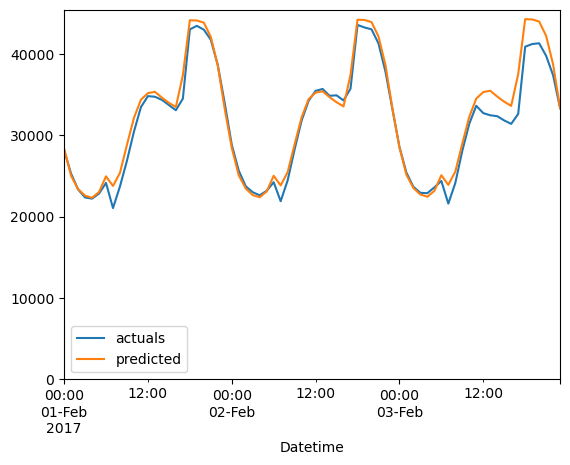

In [8]:
test_preds = pd.DataFrame({
    "actuals": y_test.values,
    "predicted": model.predict(X_test)
})

test_preds.plot(ylim=0)

<Axes: xlabel='Datetime'>

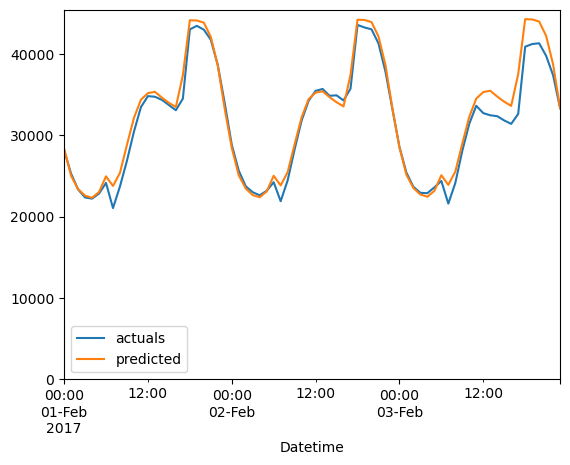

In [9]:
test_preds = pd.DataFrame({
    "actuals": y_test.values, 
    "predicted": model.predict(X_test)
})

test_preds.plot(ylim=0)

## Facebook Prophet

In [51]:
from prophet import Prophet

electricity_prophet = (
    electricity_df
    .reset_index()
    .rename({"Datetime": "ds", "PowerConsumption_Zone1": "y"}, axis=1)
)

electricity_train = electricity_prophet.query("ds < '2017-02-01'")   
electricity_test = electricity_prophet.query("'2017-02-01' <= ds < '2017-02-04'")
                                            
electricity_test.tail()  

,ds,y,trend,hour_1,hour_10,hour_11,hour_12,hour_13,hour_14,hour_15,...,hour_21,hour_22,hour_23,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9
811,2017-02-03 19:00:00,41218.983052,811,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
812,2017-02-03 20:00:00,41316.610170,812,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
813,2017-02-03 21:00:00,39773.898305,813,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
814,2017-02-03 22:00:00,37381.016948,814,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
815,2017-02-03 23:00:00,33327.457627,815,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


In [52]:
model = Prophet()
model.fit(electricity_train[["ds", "y"]]) 

08:16:38 - cmdstanpy - INFO - Chain [1] start processing
08:16:38 - cmdstanpy - INFO - Chain [1] done processing


C:\Users\fonse\anaconda3\Lib\site-packages\prophet\forecaster.py:1872: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(


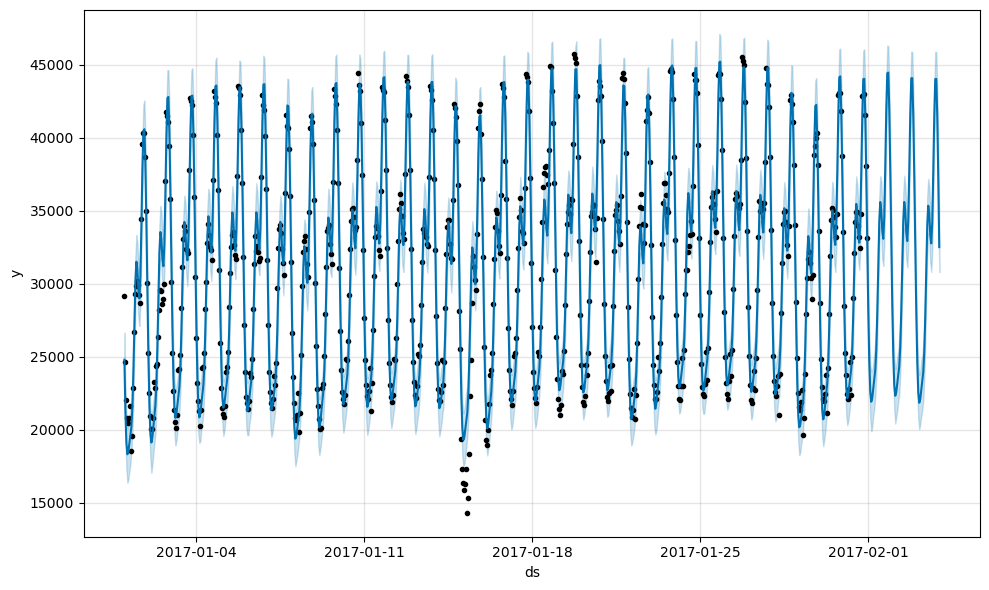

In [53]:
future = model.make_future_dataframe(periods=72, freq="H")

forecast = model.predict(future)

model.plot(forecast);

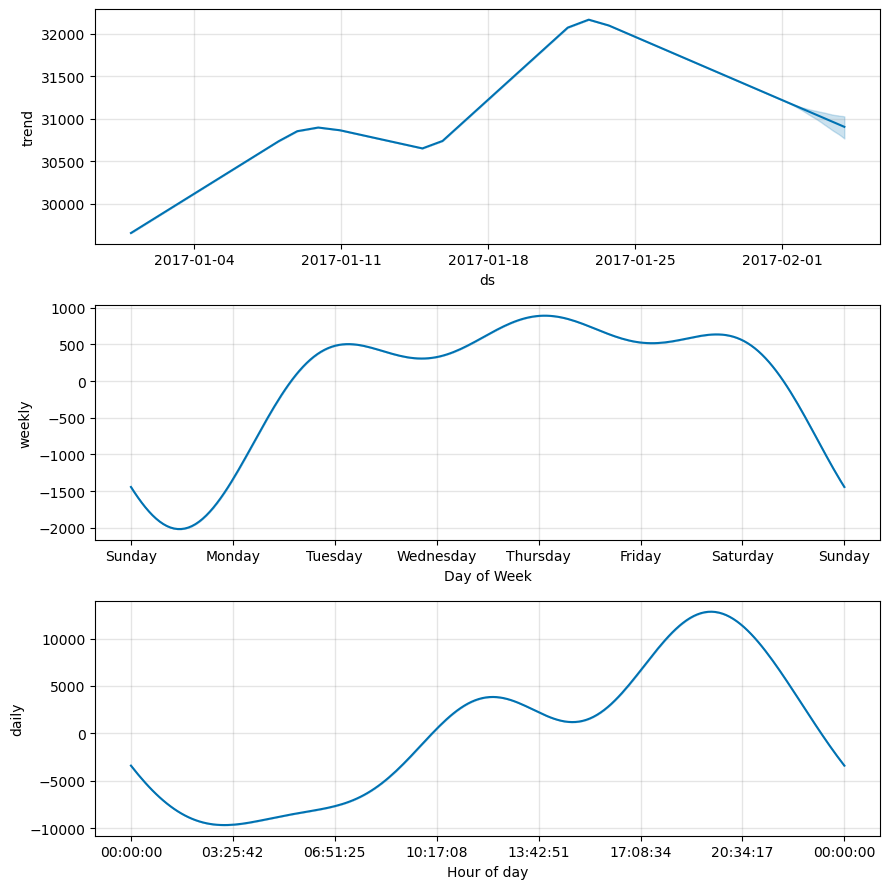

In [54]:
model.plot_components(forecast);

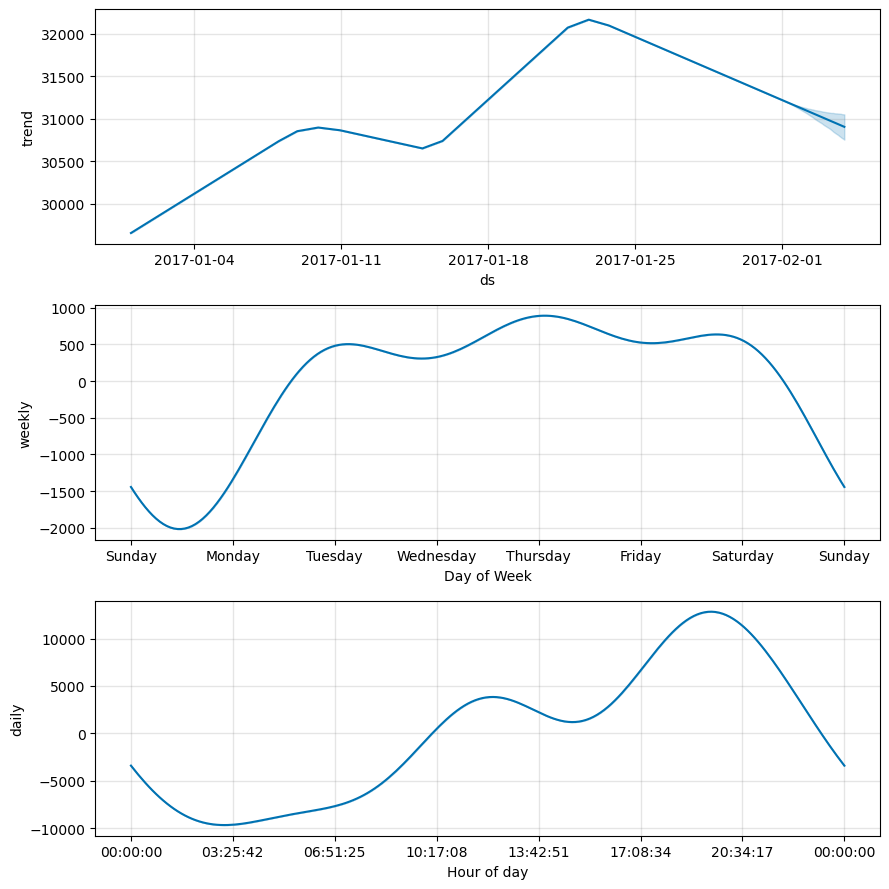

In [39]:
model.plot_components(forecast);

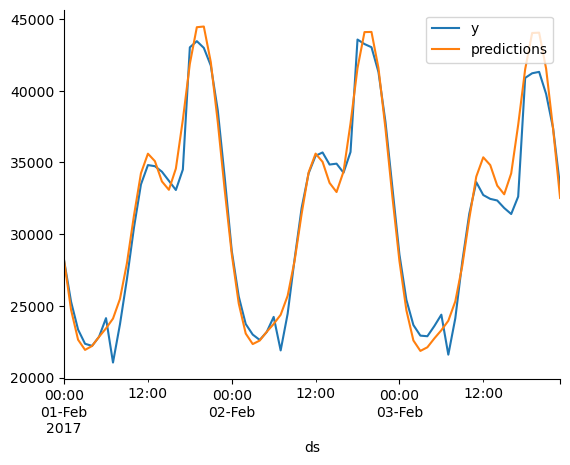

In [55]:
electricity_score = (
electricity_test
 .assign(predictions = model.predict(future)["yhat"])
 .set_index("ds")
 .loc[:,["y", "predictions"]]
)

electricity_score.plot()

sns.despine()

In [56]:
print(f"MAE: {mae(electricity_score['y'], electricity_score['predictions'])}")
print(f"MAPE: {mape(electricity_score['y'], electricity_score['predictions'])}")

MAE: 1048.2000077003993
MAPE: 0.03443969481702552
